# r book

In [425]:
library(lubridate)
library(tidyverse)
library(ggplot2)
library(dplyr)

In [426]:
df <- read.csv("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", header=TRUE)

In [427]:
nrow(df)

[1] 714

In [428]:
head(df, 1)

,Date.Submitted,Workout.Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
1,"Aug. 8, 2022","Aug. 8, 2022",Run,797,6.34867,4013,10.5318,0.503541,5.69702,119.156,146,10360,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6765021667


In [429]:
# df <- separate(data = df, col = Date.Submitted, into = c("left", "middle", "right"), sep = " ")

In [430]:
#write.csv(df, "user94403143_workout_history_clean.csv")

In [431]:
summary(df)

 Date.Submitted     Workout.Date       Activity.Type     
 Length:714         Length:714         Length:714        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
                                                         
 Calories.Burned..kCal. Distance..mi.    Workout.Time..seconds.
 Min.   :   0.0         Min.   : 0.000   Min.   :    0         
 1st Qu.: 232.5         1st Qu.: 2.000   1st Qu.: 1462         
 Median : 403.0         Median : 3.100   Median : 1800         
 Mean   : 401.9         Mean   : 3.106   Mean   : 2416         
 3rd Qu.: 452.8         3rd Qu.: 3.523   3rd Qu.: 2332         
 Max.   :2473.0         Max.   :13.482   Max.   :80568         
                                                               
 Avg.Pace..min.mi. Max.P

In [432]:
df <- data.frame(df)

In [433]:
nrow(df)

[1] 714

In [434]:
df['duration'] <- df['Workout.Time..seconds.'] / 60

In [435]:
#determine your working library
getwd()

[1] "c:/Users/coleb/OneDrive/Coraline/MapMyRunProjects"

In [436]:
#download your file
#download.file("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", "user94403143_workout_history.csv")

In [437]:
#run_data <- read.csv("user94403143_workout_history.csv", header=TRUE)
run_data <- data.frame(df)

In [438]:
# df %>% mutate(Workout.date = Workout.Date %>% as.Date("%B %d, %Y"), left = month(Workout.Date, abbr = FALSE, label = TRUE))

In [439]:
# #convert the datetime variables using the following logic:
# #%B is a complete month name (November), %e is a day of the month (3) preceded by a space and followed by a comma and a space, and %Y is a four-digit year (2020).
# df$Workout.Date <- as.Date(df$Workout.Date, format = "%B %e, %Y")
# df$Date.Submitted <- as.Date(df$Date.Submitted, format = "%B %e, %Y")

In [440]:
library(lubridate)
library(tidyverse)

df <- df %>% mutate(Workout.Date=mdy(Workout.Date))

In [441]:
head(df, 1)

,Date.Submitted,Workout.Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link,duration
,<chr>,<date>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,"Aug. 8, 2022",2022-08-08,Run,797,6.34867,4013,10.5318,0.503541,5.69702,119.156,146,10360,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6765021667,66.88333


In [442]:
names(run_data)[names(run_data) == "Workout.Date"] <- "Date"
names(run_data)[names(run_data) == "Date.Submitted"] <- "Date.Sub"
names(run_data)[names(run_data) == "Workout.Time..seconds."] <- "Duration"
names(run_data)[names(run_data) == "Distance..mi."] <- "Distance"
names(run_data)[names(run_data) == "minutes"] <- "minutes"
names(run_data)[names(run_data) == "Activity.Type"] <- "Activity"
names(run_data)[names(run_data) == "Avg.Pace..min.mi."] <- "Avg.Pace"
names(run_data)[names(run_data) == "Max.Pace..min.mi."] <- "Max.Pace"
names(run_data)[names(run_data) == "Avg.Speed..mi.h."] <- "Avg.Spd"
names(run_data)[names(run_data) == "Avg.Heart.Rate"] <- "Avg.HR"
names(run_data)[names(run_data) == "Max.Speed..mi.h."] <- "Max.Spd"
names(run_data)[names(run_data) == "Calories.Burned..kCal."] <- "Cal.Burned"
names(run_data)[names(run_data) == "duration"] <- "Minutes"
head(run_data, 2)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,Notes,Source,Link,Minutes
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,"Aug. 8, 2022","Aug. 8, 2022",Run,797,6.34867,4013,10.5318,0.503541,5.69702,119.1560,146,10360,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6765021667,66.88333
2,"Aug. 6, 2022","Aug. 6, 2022",Walk,290,2.14121,2267,17.6365,2.308600,3.40204,25.9898,119,4141,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6762303220,37.78333


In [443]:
df <- within(run_data, rm('Link', 'Notes', 'Source'))
#df$minutes <- round(df$minutes, digits = 2)

In [444]:
#df$minutes <- as.numeric(as.character(df$minutes))
df <- df %>% mutate_if(is.numeric, round, digits = 2)

In [445]:
library(dplyr); df %>% mutate_if(is.numeric, round, digits=2)

Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,Minutes
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Aug. 8, 2022","Aug. 8, 2022",Run,797,6.35,4013,10.53,0.50,5.70,119.16,146,10360,66.88
"Aug. 6, 2022","Aug. 6, 2022",Walk,290,2.14,2267,17.64,2.31,3.40,25.99,119,4141,37.78
"Aug. 6, 2022","Aug. 6, 2022",Run,311,2.37,1410,9.91,0.95,6.05,62.99,152,3639,23.50
"Aug. 3, 2022","Aug. 3, 2022",Run,820,6.09,3600,9.85,0.00,6.09,0.00,NA,9545,60.00
"July 30, 2022","July 30, 2022",Run,1117,8.00,5187,10.81,0.00,5.55,0.00,NA,13634,86.45
"July 28, 2022","July 28, 2022",Run,314,3.16,1905,10.06,0.38,5.96,158.18,158,5020,31.75
"July 25, 2022","July 25, 2022",Run,430,4.26,6268,24.48,0.83,2.45,72.12,87,8227,104.47
"July 24, 2022","July 24, 2022",Run,415,3.10,1805,9.70,0.00,6.18,0.00,NA,4793,30.08
"July 21, 2022","July 21, 2022",Walk,227,1.60,1657,17.21,1.70,3.49,35.29,131,3001,27.62


In [446]:
df <- df %>% drop_na(Date)
# df <- df %>% drop_na(Date.Sub)

In [447]:
nrow(df)

[1] 714

In [448]:
summary(df)

   Date.Sub             Date             Activity           Cal.Burned    
 Length:714         Length:714         Length:714         Min.   :   0.0  
 Class :character   Class :character   Class :character   1st Qu.: 232.5  
 Mode  :character   Mode  :character   Mode  :character   Median : 403.0  
                                                          Mean   : 401.9  
                                                          3rd Qu.: 452.8  
                                                          Max.   :2473.0  
                                                                          
    Distance         Duration        Avg.Pace         Max.Pace      
 Min.   : 0.000   Min.   :    0   Min.   :  0.00   Min.   :  0.000  
 1st Qu.: 2.000   1st Qu.: 1462   1st Qu.:  9.06   1st Qu.:  0.000  
 Median : 3.100   Median : 1800   Median :  9.74   Median :  0.860  
 Mean   : 3.107   Mean   : 2416   Mean   : 13.00   Mean   :  2.059  
 3rd Qu.: 3.520   3rd Qu.: 2332   3rd Qu.: 11.07   3rd 

In [449]:
library(data.table)
#setDT(df)[value==0, value := NA,]
#df[, value := replace(value, is.na(value), mean(value, na.rm = TRUE)) , by = .(year, age)]

In [450]:
HRmedian <- median(df$Avg.HR)
Stepsmedian <- median(df$Steps)

In [451]:
library(lubridate)
library(tidyverse)

df <- df %>% mutate(Date=mdy(Date))

In [452]:
# df[is.na(df)] = 0

In [453]:
head(df, 4)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,Minutes
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"Aug. 8, 2022",2022-08-08,Run,797,6.35,4013,10.53,0.50,5.70,119.16,146,10360,66.88
2,"Aug. 6, 2022",2022-08-06,Walk,290,2.14,2267,17.64,2.31,3.40,25.99,119,4141,37.78
3,"Aug. 6, 2022",2022-08-06,Run,311,2.37,1410,9.91,0.95,6.05,62.99,152,3639,23.50
4,"Aug. 3, 2022",2022-08-03,Run,820,6.09,3600,9.85,0.00,6.09,0.00,NA,9545,60.00


In [454]:
df[is.na(df)] = 0

In [455]:
df <- df %>% dplyr::mutate(Avg.HR = ifelse(Avg.HR == 0, HRmedian, Avg.HR))
# #df <- df %>% dplyr::mutate(Avg.HR = ifelse(Avg.HR == NA, HRmean, Avg.HR))
df <- df %>% dplyr::mutate(Steps = ifelse(Steps == 0, Stepsmedian, Steps))
# #df <- df %>% dplyr::mutate(Steps = ifelse(Steps == NA, Stepsmean, Steps))

In [456]:
# df[df == 0] = NA

In [457]:
df$Avg.HR[is.na(df$Avg.HR)] <- median(df$Avg.HR, na.rm = TRUE)
df$Steps[is.na(df$Steps)] <- median(df$Steps, na.rm = TRUE)
df$Max.Pace[is.na(df$Max.Pace)] <- median(df$Max.Pace, na.rm = TRUE)
df$Avg.Pace[is.na(df$Avg.Pace)] <- median(df$Avg.Pace, na.rm = TRUE)
df$Max.Spd[is.na(df$Max.Spd)] <- median(df$Max.Spd, na.rm = TRUE)
df$Avg.Spd[is.na(df$Avg.Spd)] <- median(df$Avg.Spd, na.rm = TRUE)
df$Cal.Burned[is.na(df$Cal.Burned)] <- median(df$Cal.Burned, na.rm = TRUE)

In [458]:
library(lubridate)
df$day <- weekdays(as.Date(df$Date))
df$dayofmonth <- day(as.Date(df$Date))
df$month <- months(as.Date(df$Date))
df$year <- format(as.Date(df$Date, format="%M/%d/%Y"),"%Y")

In [459]:
df <- df %>% mutate(mileage = cut(Distance, breaks=c(0, 3.09, 6.19, 13.09, 20), labels=c("Short", "FiveK", "TenK", "HalfMar")))

In [460]:
head(df, 4)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,Minutes,day,dayofmonth,month,year,mileage
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<fct>
1,"Aug. 8, 2022",2022-08-08,Run,797,6.35,4013,10.53,0.50,5.70,119.16,146,10360,66.88,Monday,8,August,2022,TenK
2,"Aug. 6, 2022",2022-08-06,Walk,290,2.14,2267,17.64,2.31,3.40,25.99,119,4141,37.78,Saturday,6,August,2022,Short
3,"Aug. 6, 2022",2022-08-06,Run,311,2.37,1410,9.91,0.95,6.05,62.99,152,3639,23.50,Saturday,6,August,2022,Short
4,"Aug. 3, 2022",2022-08-03,Run,820,6.09,3600,9.85,0.00,6.09,0.00,149,9545,60.00,Wednesday,3,August,2022,FiveK


In [461]:
df <- df[, c("Date", "Activity", "Duration", "Distance", "Avg.Pace", "Max.Pace", "Avg.Spd", "Max.Spd", "Cal.Burned", "Avg.HR", "Steps", "mileage")]

In [462]:
df2 = df[sapply(df, is.numeric)]

In [463]:
library(ggplot2)

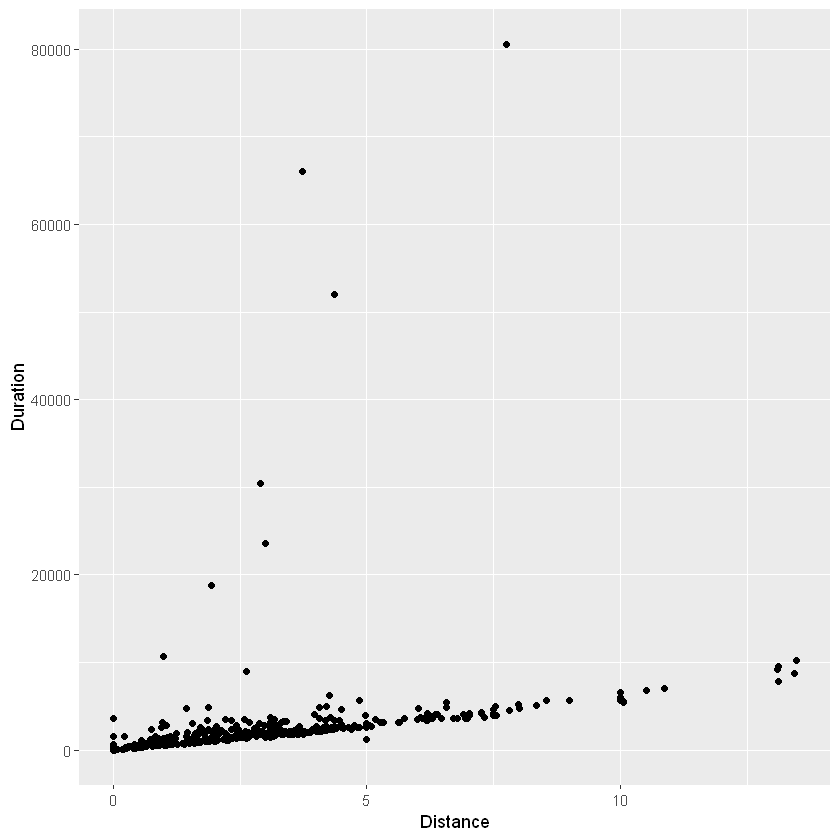

In [464]:
ggplot(data = df2, mapping = aes(x = Distance, y = Duration)) + 
    geom_point()

In [465]:
head(df2)

,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Cal.Burned,Avg.HR,Steps
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4013,6.35,10.53,0.50,5.70,119.16,797,146,10360
2,2267,2.14,17.64,2.31,3.40,25.99,290,119,4141
3,1410,2.37,9.91,0.95,6.05,62.99,311,152,3639
4,3600,6.09,9.85,0.00,6.09,0.00,820,149,9545
5,5187,8.00,10.81,0.00,5.55,0.00,1117,149,13634
6,1905,3.16,10.06,0.38,5.96,158.18,314,158,5020


In [466]:
head(df, 1)

,Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Cal.Burned,Avg.HR,Steps,mileage
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2022-08-08,Run,4013,6.35,10.53,0.5,5.7,119.16,797,146,10360,TenK


In [467]:
library(dplyr)
library(tidyverse)

In [468]:
df$minutes <- df$Duration / 60
df$minutes <- round(df$minutes, digits = 2)

In [469]:
#Remove erroneous data (I know I have not run anything over 170 minutes)
#df2 <- df2[df2$minutes < 170,]
df2 <- df2[df2$Avg.Spd < 10,]
df2 <- df2[df2$Cal.Burned < 2000,]
#df2 <- df[df$Date > '2019-01-01',]
df <- df[df$minutes < 170,]
df <- df[df$Avg.Spd < 10,]
df <- df[df$Cal.Burned < 2000,]
#df <- df[df$Date > '2019-01-01',]

In [470]:
head(df, 4)

,Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Cal.Burned,Avg.HR,Steps,mileage,minutes
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,2022-08-08,Run,4013,6.35,10.53,0.50,5.70,119.16,797,146,10360,TenK,66.88
2,2022-08-06,Walk,2267,2.14,17.64,2.31,3.40,25.99,290,119,4141,Short,37.78
3,2022-08-06,Run,1410,2.37,9.91,0.95,6.05,62.99,311,152,3639,Short,23.50
4,2022-08-03,Run,3600,6.09,9.85,0.00,6.09,0.00,820,149,9545,FiveK,60.00


In [471]:
head(df2, 4)

,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Cal.Burned,Avg.HR,Steps
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4013,6.35,10.53,0.50,5.70,119.16,797,146,10360
2,2267,2.14,17.64,2.31,3.40,25.99,290,119,4141
3,1410,2.37,9.91,0.95,6.05,62.99,311,152,3639
4,3600,6.09,9.85,0.00,6.09,0.00,820,149,9545


In [473]:
#Create subsets for years 2021 and 2022
df2022 <- df[df$Date >= "2022-01-01",]
df2021 <- subset(df, Date < "2022-01-01" & Date >= "2021-01-01")

In [479]:
library(lubridate)

In [482]:
df$year <- format(df$Date, format = "%Y")
df$year <- as.integer(df$year)

In [483]:
head(df, 4)

,Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Cal.Burned,Avg.HR,Steps,mileage,minutes,year
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>
1,2022-08-08,Run,4013,6.35,10.53,0.50,5.70,119.16,797,146,10360,TenK,66.88,2022
2,2022-08-06,Walk,2267,2.14,17.64,2.31,3.40,25.99,290,119,4141,Short,37.78,2022
3,2022-08-06,Run,1410,2.37,9.91,0.95,6.05,62.99,311,152,3639,Short,23.50,2022
4,2022-08-03,Run,3600,6.09,9.85,0.00,6.09,0.00,820,149,9545,FiveK,60.00,2022


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



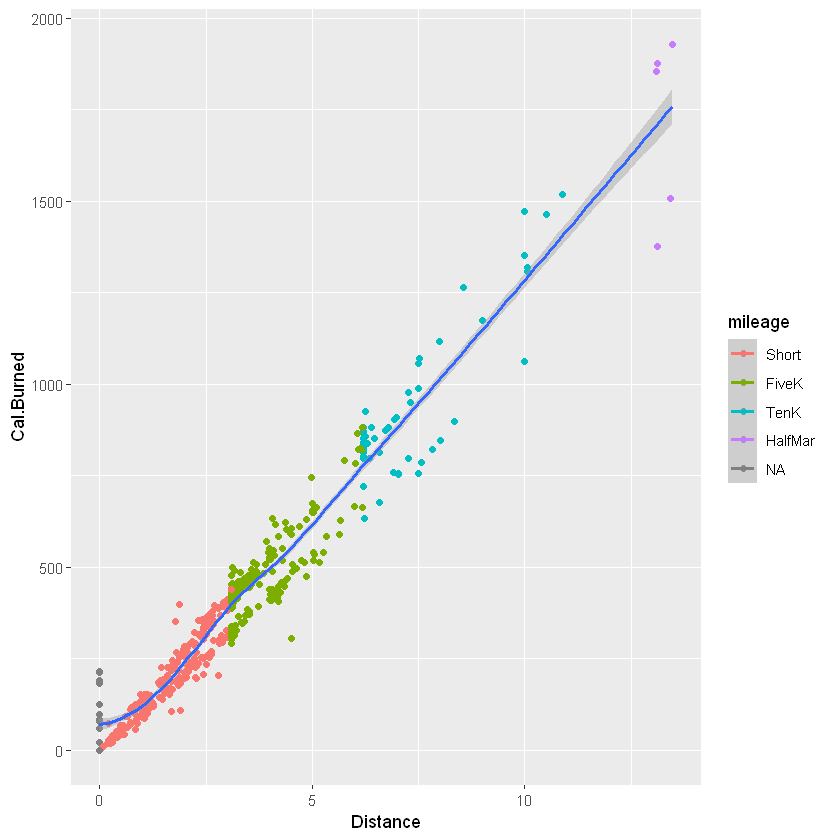

In [484]:
ggplot(data = df, mapping = aes(x = Distance, y = Cal.Burned, color = mileage)) + 
    geom_point() + geom_smooth(aes(color = year))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



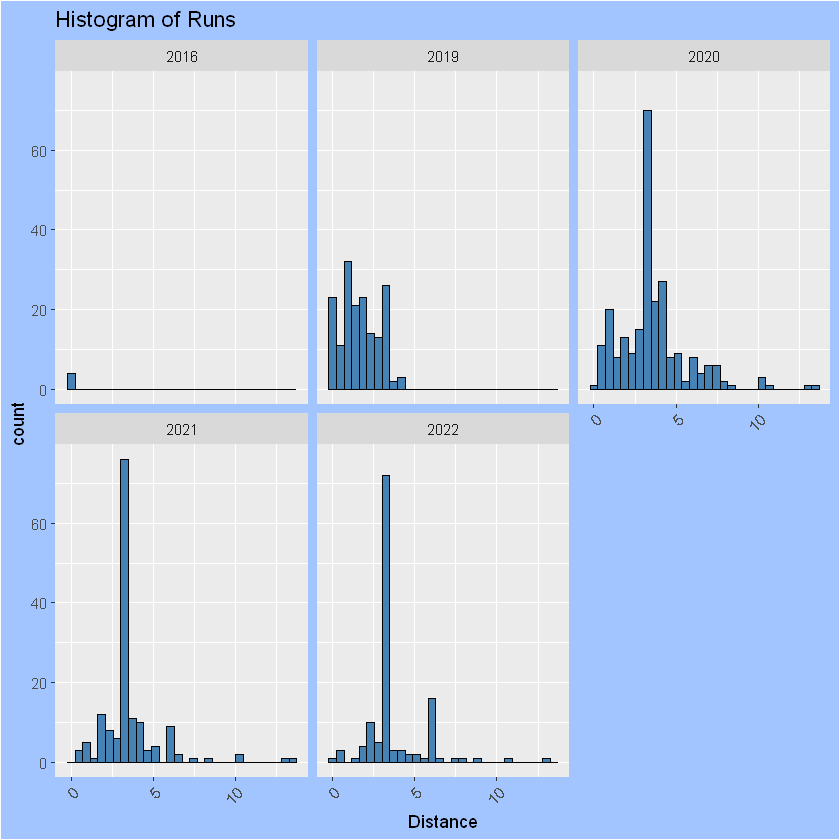

In [486]:
library(ggplot2)
ggplot(data=df, aes(x=Distance)) +
  geom_histogram(fill="steelblue", color="black") +
  ggtitle("Histogram of Runs") +
  facet_wrap(~year) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
  plot.background = element_rect(fill = "#a3c5ff"))

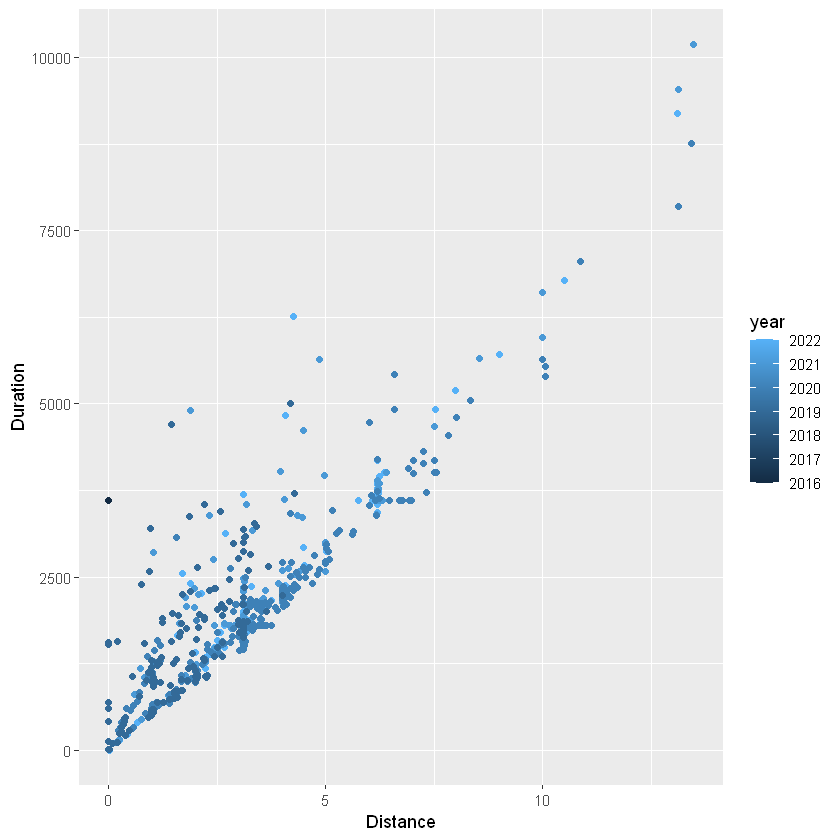

In [487]:
ggplot(data=df, aes(x=Distance, y=Duration, color=year)) + 
  geom_point()

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"


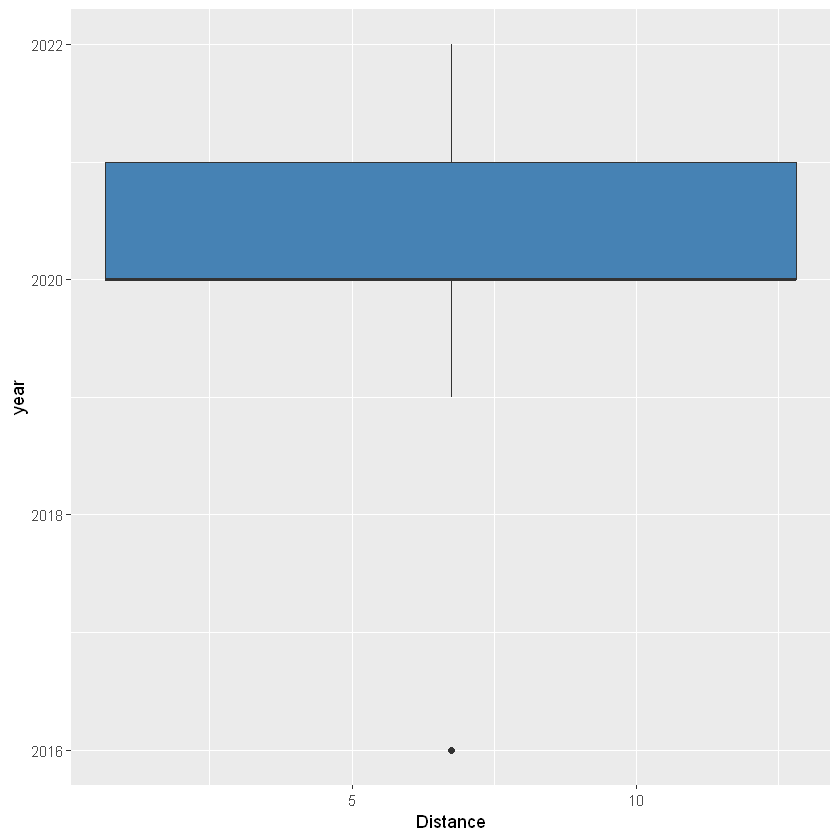

In [491]:
ggplot(data=df, aes(x=Distance, y=year)) + 
  geom_boxplot(fill="steelblue")

In [240]:
# df <- df %>% mutate(new_bin = cut(Distance, breaks=c(0, 3.09, 6.21, 13.09, 15)))


In [492]:
names(df)[names(df) == "new_bin"] <- "Miles"

In [493]:
head(df, 1)

,Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Cal.Burned,Avg.HR,Steps,mileage,minutes,year
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>
1,2022-08-08,Run,4013,6.35,10.53,0.5,5.7,119.16,797,146,10360,TenK,66.88,2022


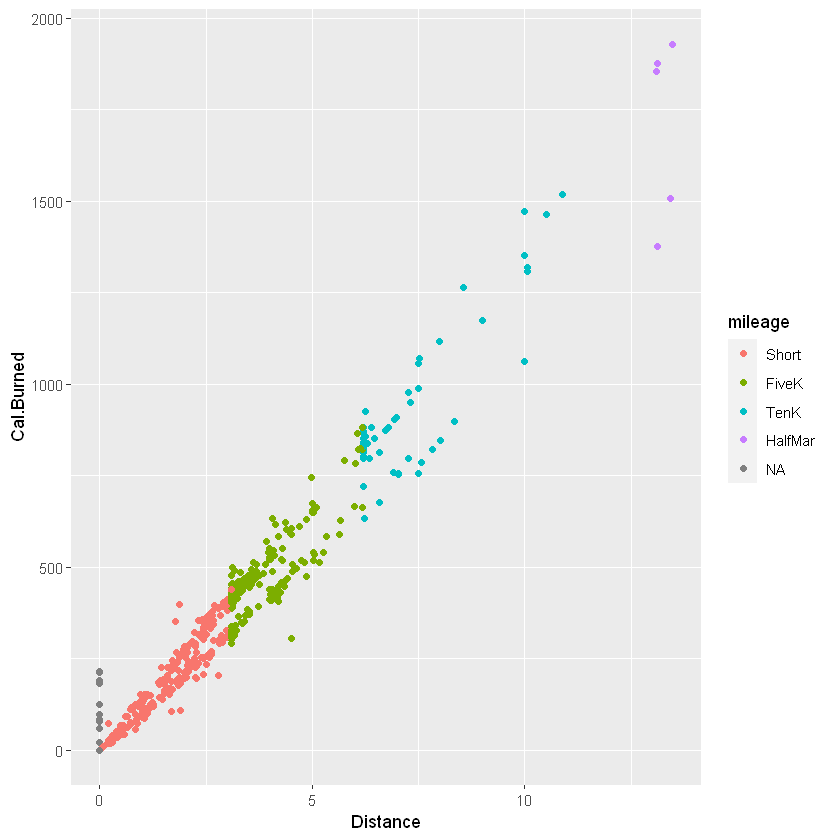

In [495]:
ggplot(data=df, aes(x=Distance, y=Cal.Burned, color=mileage)) + 
  geom_point()

In [496]:
sapply(df, function(x) sum(is.na(x)))
#sapply(df, function(x) sum(duplicated(x)))

Date   Activity   Duration   Distance   Avg.Pace   Max.Pace    Avg.Spd 
         0          0          0          0          0          0          0 
   Max.Spd Cal.Burned     Avg.HR      Steps    mileage    minutes       year 
         0          0          0          0         23          0          0

In [497]:
head(df, 4)

,Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Cal.Burned,Avg.HR,Steps,mileage,minutes,year
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>
1,2022-08-08,Run,4013,6.35,10.53,0.50,5.70,119.16,797,146,10360,TenK,66.88,2022
2,2022-08-06,Walk,2267,2.14,17.64,2.31,3.40,25.99,290,119,4141,Short,37.78,2022
3,2022-08-06,Run,1410,2.37,9.91,0.95,6.05,62.99,311,152,3639,Short,23.50,2022
4,2022-08-03,Run,3600,6.09,9.85,0.00,6.09,0.00,820,149,9545,FiveK,60.00,2022


In [45]:
nrow(df)

[1] 697

## Amazon Halo Data

In [55]:
hdf <- read.csv("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/Activity_Workouts_1970-01-01--2022-07-15_637a6b45-761f-4361-b9e9-13651fb7ee20.csv")

In [56]:
head(hdf, 2)

,Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Software.OS,Software.OS.Version,Active.Time..ms.,Total.Duration..ms.,Activity.Pause,Session.Source
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2022-07-20T20:01:25.436Z,2022-07-20T21:05:07.544Z,WORKOUT,RUNNING,Automatic,-6,125.15453666666666,3720000.0,67544.0,171,153,9664,1068,1.0.118889,ios,15.6,3822108,3822108,Not Applicable,User Logged
2,2022-07-18T16:20:58.102Z,2022-07-18T16:31:55.423Z,WORKOUT,WALKING,Automatic,-6,0.5461858333333334,No Data,No Data,111,93,830,75,1.0.118889,ios,15.6,657321,657321,Not Applicable,User Logged


In [57]:
cadf <- within(hdf, rm('Activity.Pause', 'Session.Source', 'Software.OS.Version', 'Software.OS'))

In [58]:
head(cadf, 2)

,Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-07-20T20:01:25.436Z,2022-07-20T21:05:07.544Z,WORKOUT,RUNNING,Automatic,-6,125.15453666666666,3720000.0,67544.0,171,153,9664,1068,1.0.118889,3822108,3822108
2,2022-07-18T16:20:58.102Z,2022-07-18T16:31:55.423Z,WORKOUT,WALKING,Automatic,-6,0.5461858333333334,No Data,No Data,111,93,830,75,1.0.118889,657321,657321


### Test Split Date

In [59]:
dtparts <- t(as.data.frame(str_split(cadf$Start.Time, "T")))

In [60]:
row.names(dtparts) = NULL

In [61]:
install.packages("chron")
library(chron)

Installing package into 'C:/software/Rpackages'
(as 'lib' is unspecified)



package 'chron' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'chron'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\software\Rpackages\00LOCK\chron\libs\x64\chron.dll to C:\software\Rpackages\chron\libs\x64\chron.dll: Permission denied"
Warning message:
"restored 'chron'"



The downloaded binary packages are in
	C:\Users\coleb\AppData\Local\Temp\RtmpOUfgwY\downloaded_packages



Attaching package: 'chron'


The following objects are masked from 'package:lubridate':

    days, hours, minutes, seconds, years




In [62]:
dates = dtparts[,1]
times = dtparts[,2]

In [63]:
dates <- as.Date(dates)
dates <- as.data.frame(dates)


In [64]:
names(dates)[names(dates) == "dates"] <- "Date"

In [65]:
cadf <- as.data.frame(cadf)

In [66]:
merge(cadf, dates)

Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.,Date
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<date>
2022-07-20T20:01:25.436Z,2022-07-20T21:05:07.544Z,WORKOUT,RUNNING,Automatic,-6,125.15453666666666,3720000.0,67544.0,171,153,9664,1068,1.0.118889,3822108,3822108,2022-07-20
2022-07-18T16:20:58.102Z,2022-07-18T16:31:55.423Z,WORKOUT,WALKING,Automatic,-6,0.5461858333333334,No Data,No Data,111,93,830,75,1.0.118889,657321,657321,2022-07-20
2022-07-18T15:49:05.877Z,2022-07-18T16:00:03.144Z,WORKOUT,WALKING,Automatic,-6,0.4977225,No Data,No Data,110,98,733,80,1.0.118889,657267,657267,2022-07-20
2022-07-18T15:22:12.198Z,2022-07-18T15:34:09.457Z,WORKOUT,WALKING,Automatic,-6,1.35,No Data,60000.0,111,95,743,82,1.0.118889,717259,717259,2022-07-20
2022-07-18T11:29:11.486Z,2022-07-18T13:11:43.104Z,WORKOUT,RUNNING,Automatic,-6,191.76713333333333,5568514.0,360000.0,162,141,15064,1535,1.0.118889,6151618,6151618,2022-07-20
2022-07-18T00:20:44.568Z,2022-07-18T00:54:35.062Z,WORKOUT,RUNNING,Automatic,-6,57.01286,1560000.0,300000.0,175,141,4463,496,1.0.118889,2030494,2030494,2022-07-20
2022-07-16T18:57:19.226Z,2022-07-16T19:31:10.404Z,WORKOUT,RUNNING,Automatic,-6,58.679566666666666,1680000.0,160774.0,148,130,4521,445,1.0.118889,2031178,2031178,2022-07-20
2022-07-15T22:04:00.000Z,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,600000.0,115,92,600,168,1.0.118889,1800000,1800000,2022-07-20
2022-07-14T12:50:31.751Z,2022-07-14T13:31:22.500Z,WORKOUT,RUNNING,Automatic,-6,74.44854083333334,2100000.0,262500.0,166,143,6084,622,1.0.118889,2450749,2450749,2022-07-20


In [67]:
#cadf %>% separate(Start.Time, c(Date, Time), "T")

### Better date split option

In [68]:
library(dplyr)
library(tidyr)
cadf <- cadf %>% separate(Start.Time, c('Date', 'Time'), "T")

In [69]:
head(cadf, 2)

,Date,Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-07-20,20:01:25.436Z,2022-07-20T21:05:07.544Z,WORKOUT,RUNNING,Automatic,-6,125.15453666666666,3720000.0,67544.0,171,153,9664,1068,1.0.118889,3822108,3822108
2,2022-07-18,16:20:58.102Z,2022-07-18T16:31:55.423Z,WORKOUT,WALKING,Automatic,-6,0.5461858333333334,No Data,No Data,111,93,830,75,1.0.118889,657321,657321


In [70]:
cadf <- cadf %>% mutate(Date = as.Date(Date))

In [71]:
# mymerge <- merge(cadf, df, by = c("Date"))

In [72]:
library(stringr)
library(tidyr)
cadf <- separate(cadf, Time, c('Times', 'Ms'), "[.]")

In [73]:
head(cadf, 1)

,Date,Times,Ms,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-07-20,20:01:25,436Z,2022-07-20T21:05:07.544Z,WORKOUT,RUNNING,Automatic,-6,125.15453666666666,3720000.0,67544.0,171,153,9664,1068,1.0.118889,3822108,3822108


In [74]:
cadf$DTS <- with(cadf, ymd(Date) + hms(Times))

In [75]:
library("lubridate")
hours <- -3600 * cadf$Local.Time.Zone.Offset
cadf$my_date_time1 <- cadf$DTS + (-3600 * cadf$Local.Time.Zone.Offset)

In [76]:
head(cadf, 1)

,Date,Times,Ms,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.,DTS,my_date_time1
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>
1,2022-07-20,20:01:25,436Z,2022-07-20T21:05:07.544Z,WORKOUT,RUNNING,Automatic,-6,125.15453666666666,3720000.0,67544.0,171,153,9664,1068,1.0.118889,3822108,3822108,2022-07-20 20:01:25,2022-07-21 02:01:25


In [77]:
cadf <- separate(cadf, my_date_time1, c('Date 2', 'Time 2'), " ")

In [78]:
head(cadf, 1)

,Date,Times,Ms,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,⋯,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.,DTS,Date 2,Time 2
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dttm>,<chr>,<chr>
1,2022-07-20,20:01:25,436Z,2022-07-20T21:05:07.544Z,WORKOUT,RUNNING,Automatic,-6,125.15453666666666,3720000.0,⋯,171,153,9664,1068,1.0.118889,3822108,3822108,2022-07-20 20:01:25,2022-07-21,02:01:25


In [79]:
cadf <- within(cadf, rm('Date', 'Time 2', 'Software.Version', 'Ms'))

In [80]:
head(cadf, 2)

,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Active.Time..ms.,Total.Duration..ms.,DTS,Date 2
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<chr>
1,20:01:25,2022-07-20T21:05:07.544Z,WORKOUT,RUNNING,Automatic,-6,125.15453666666666,3720000.0,67544.0,171,153,9664,1068,3822108,3822108,2022-07-20 20:01:25,2022-07-21
2,16:20:58,2022-07-18T16:31:55.423Z,WORKOUT,WALKING,Automatic,-6,0.5461858333333334,No Data,No Data,111,93,830,75,657321,657321,2022-07-18 16:20:58,2022-07-18


In [81]:
names(cadf)[17] <- 'Date'

In [82]:
head(cadf, 2)

,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Active.Time..ms.,Total.Duration..ms.,DTS,Date
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<chr>
1,20:01:25,2022-07-20T21:05:07.544Z,WORKOUT,RUNNING,Automatic,-6,125.15453666666666,3720000.0,67544.0,171,153,9664,1068,3822108,3822108,2022-07-20 20:01:25,2022-07-21
2,16:20:58,2022-07-18T16:31:55.423Z,WORKOUT,WALKING,Automatic,-6,0.5461858333333334,No Data,No Data,111,93,830,75,657321,657321,2022-07-18 16:20:58,2022-07-18


In [83]:
df$Date <- as.Date(df$Date)
cadf$Date <- as.Date(cadf$Date)

In [84]:
head(df, 2)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Speed,Avg.HR,Steps,duration,day,month,year,Miles
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<fct>
1,"July 20, 2022",2022-07-20,Run,836,6.2,3689,9.92,0.00,6.05,0.0,0,9775,61.48,Wednesday,July,NA,"(3.09,6.21]"
2,"July 18, 2022",2022-07-18,Run,1175,9.0,5709,10.57,0.46,5.68,130.3,143,14918,95.15,Monday,July,NA,"(6.21,13.1]"


In [85]:
cadf2 <- filter(cadf, Session.Subtype == 'RUNNING')

In [86]:
mymerge <-merge(x=cadf2,y=df,by='Date')

In [87]:
length(mymerge)
length(cadf2)
length(df)
nrow(mymerge)
nrow(cadf2)
nrow(df)

[1] 33

[1] 17

[1] 17

[1] 150

[1] 159

[1] 691

In [88]:
mymerge <- mymerge[order(mymerge$Date),]

In [89]:
mymerge$year <- format(mymerge$Date, format = "%Y")

In [90]:
head(mymerge, 2)

,Date,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,⋯,Max.Pace,Avg.Spd,Max.Speed,Avg.HR,Steps.y,duration,day,month,year,Miles
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>
1,2021-09-23,12:18:41,2021-09-23T12:59:29.798Z,WORKOUT,RUNNING,Automatic,-5,76.51169,2160000.0,269798.0,⋯,2.40,5.98,24.99,146,5720,35.72,Thursday,September,2021,"(3.09,6.21]"
2,2021-09-24,12:30:07,2021-09-24T13:13:14.739Z,WORKOUT,RUNNING,Automatic,-5,76.28969833333333,2040000.0,494739.0,⋯,4.25,6.36,14.13,161,5340,33.58,Friday,September,2021,"(3.09,6.21]"


## EDA with my merged data set

In [91]:
mm22 <- mymerge %>% select(c("Distance", "Duration", "Activity.Score", "duration", "Steps.y", "Max.Speed", "Avg.HR", "Avg.Spd", "Cal.Burned"))

In [92]:
mm22 <- transform(mm22,
                             Activity.Score = as.numeric(Activity.Score))

In [93]:
mm22 <- mm22 %>%

  filter(!duplicated(cbind(Distance,  Duration, Cal.Burned)))

In [94]:
head(mm22, 20)

,Distance,Duration,Activity.Score,duration,Steps.y,Max.Speed,Avg.HR,Avg.Spd,Cal.Burned
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.56,2143,76.51169,35.72,5720,24.99,146,5.98,469
2,3.56,2015,76.28970,33.58,5340,14.13,161,6.36,494
3,4.00,2164,72.41923,36.07,5790,0.00,0,6.65,521
4,4.00,2135,72.90169,35.58,5720,0.00,0,6.74,520
5,3.57,2012,72.83316,33.53,5405,62.79,150,6.38,457
6,4.40,2573,94.71112,42.88,6816,67.00,153,6.16,603
7,3.10,1581,57.62157,26.35,4257,0.00,0,7.06,402
8,3.10,1557,55.09420,25.95,4200,0.00,0,7.17,400
9,3.10,1800,57.93465,30.00,4796,10.75,148,6.21,403


## Plot EDA

In [498]:
df2 = df[sapply(df, is.numeric)]

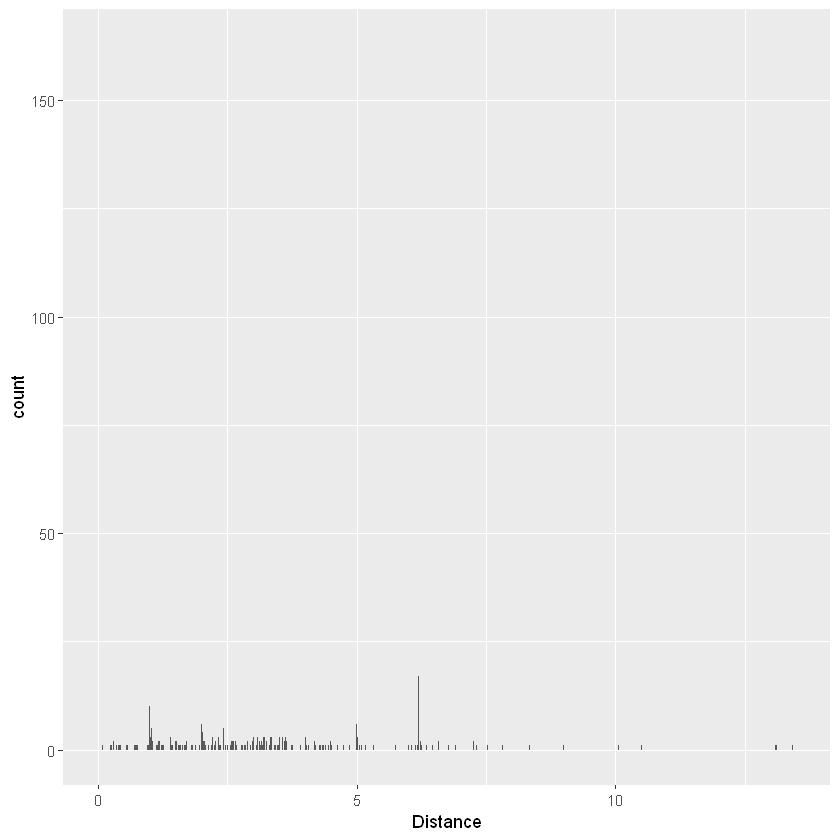

In [499]:
ggplot(data = df2) +
  geom_bar(mapping = aes(x = Distance))

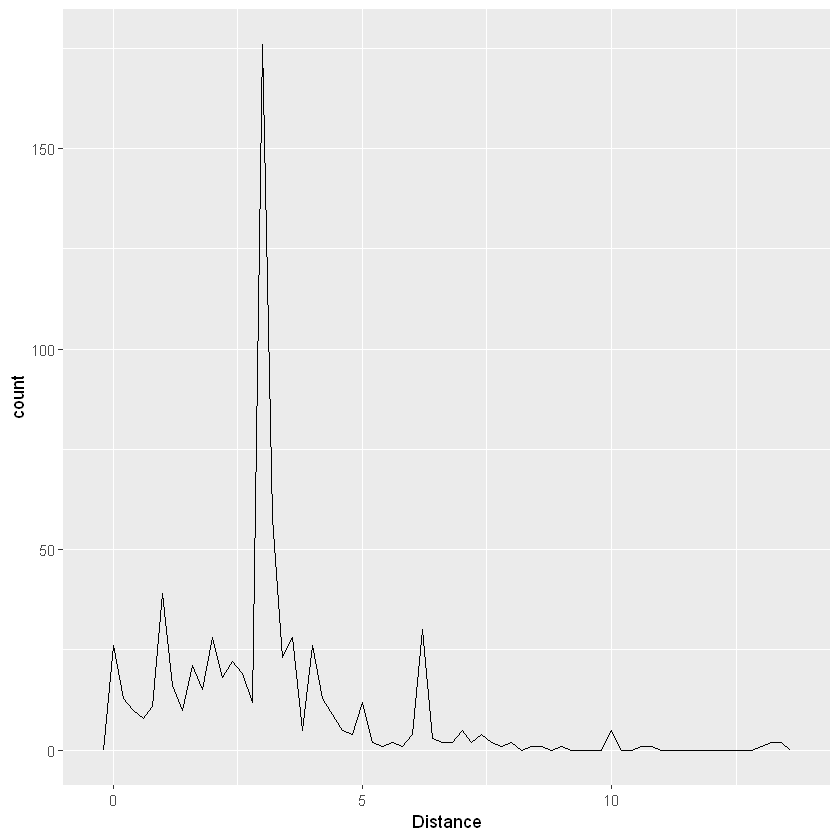

In [500]:
ggplot(data = df2, mapping = aes(x = Distance, colour = Duration)) +
  geom_freqpoly(binwidth = 0.2)

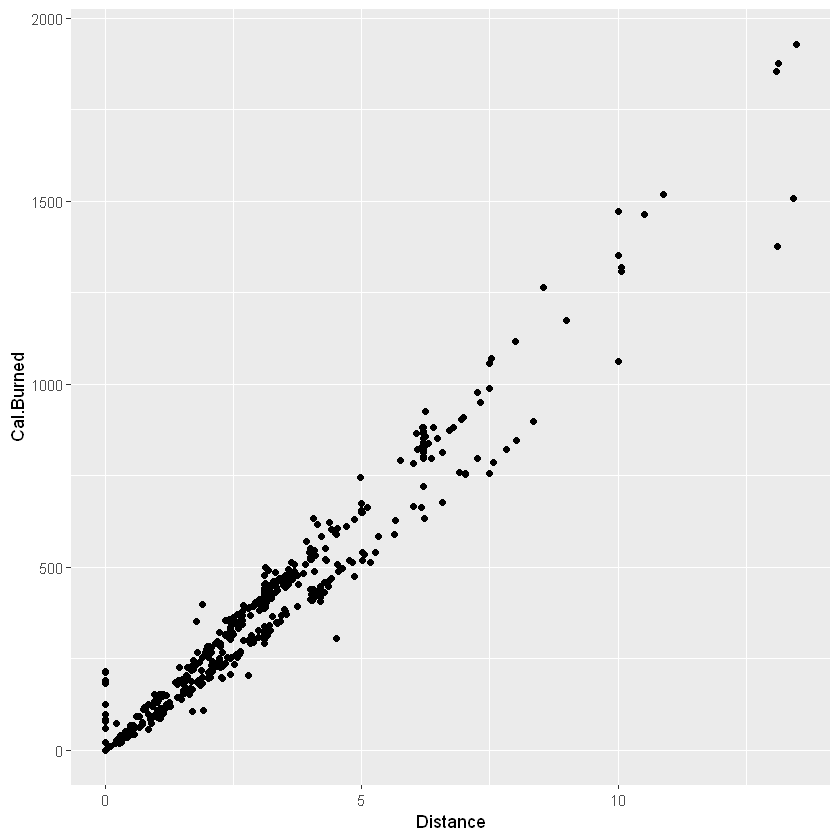

In [501]:
ggplot(data = df2, mapping = aes(x = Distance, y = Cal.Burned)) + 
  geom_point()

In [502]:
cormat <- round(cor(df2),2)
head(cormat)


,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Cal.Burned,Avg.HR,Steps,minutes,year
Duration,1.00,0.87,0.09,-0.06,-0.01,0.15,0.87,0.03,0.91,1.00,0.19
Distance,0.87,1.00,-0.16,-0.11,0.39,0.13,0.97,0.23,0.94,0.87,0.33
Avg.Pace,0.09,-0.16,1.00,0.09,-0.40,0.01,-0.17,-0.34,-0.15,0.09,-0.09
Max.Pace,-0.06,-0.11,0.09,1.00,-0.14,-0.06,-0.12,-0.07,-0.10,-0.06,-0.10
Avg.Spd,-0.01,0.39,-0.40,-0.14,1.00,0.03,0.34,0.41,0.14,-0.01,0.34
Max.Spd,0.15,0.13,0.01,-0.06,0.03,1.00,0.11,0.01,0.13,0.15,0.00


In [503]:
#install.packages("reshape2")
library(reshape2)
melted_cormat <- melt(cormat)
head(melted_cormat)


Attaching package: 'reshape2'


The following objects are masked from 'package:data.table':

    dcast, melt


The following object is masked from 'package:tidyr':

    smiths




,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Duration,Duration,1.00
2,Distance,Duration,0.87
3,Avg.Pace,Duration,0.09
4,Max.Pace,Duration,-0.06
5,Avg.Spd,Duration,-0.01
6,Max.Spd,Duration,0.15


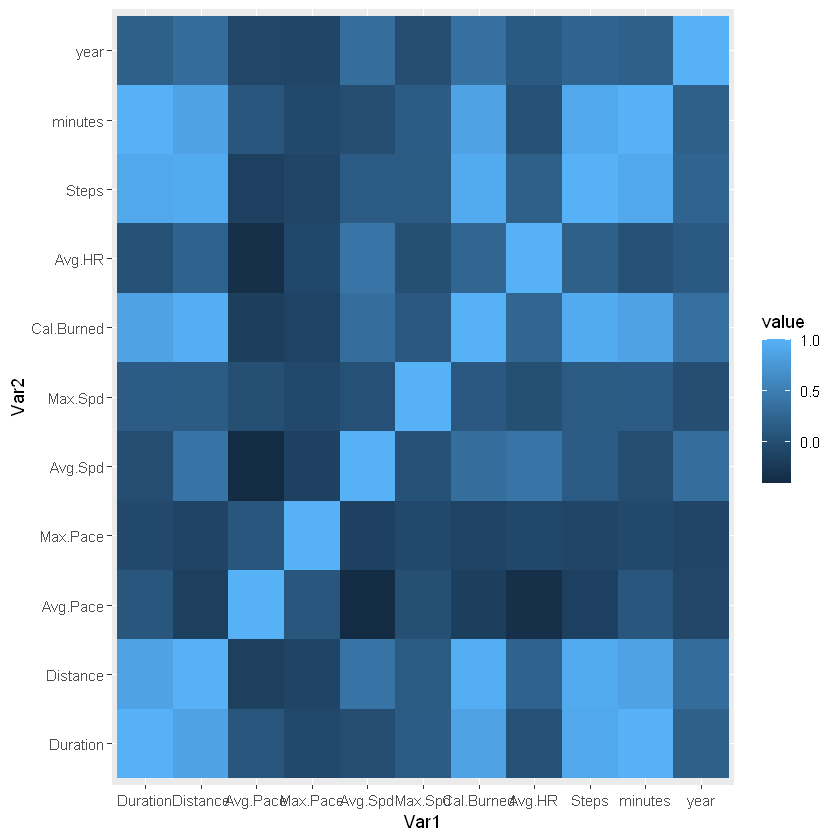

In [504]:
library(ggplot2)
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile()

In [505]:
linear_model <- lm(Cal.Burned ~ Distance, data = df2)

In [506]:
summary(linear_model)


Call:
lm(formula = Cal.Burned ~ Distance, data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-276.934  -28.282    9.599   24.455  228.778 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.416      4.144   0.824     0.41    
Distance     125.802      1.127 111.654   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 59.18 on 703 degrees of freedom
Multiple R-squared:  0.9466,	Adjusted R-squared:  0.9465 
F-statistic: 1.247e+04 on 1 and 703 DF,  p-value: < 2.2e-16


In [507]:
#Calories burned during a run (15 miles = 1, 20 miles = 2, etc.)

new_distance <- data.frame(
    Distance = c(15, 20, 26.2)   
)

pred <- predict(linear_model, new_distance, interval = "confidence")
pred

,fit,lwr,upr
1,1890.441,1863.756,1917.126
2,2519.449,2481.810,2557.089
3,3299.420,3248.133,3350.706


In [508]:
halftimes <- df2[df2$Distance > 13.09,]
#halftimes2 <- mm23[mm23$Distance > 13.09,]


In [509]:
head(halftimes, 20)

,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Cal.Burned,Avg.HR,Steps,minutes,year
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
90,9189,13.10,11.69,0.68,5.13,88.30,1854,156,22087,153.15,2022
144,9540,13.13,12.11,1.35,4.96,44.43,1876,148,22488,159.00,2021
261,10191,13.48,12.60,0.48,4.76,126.23,1928,144,22719,169.85,2021
416,8767,13.43,10.87,0.13,5.52,448.07,1508,145,23604,146.12,2020
462,7844,13.12,9.96,1.10,6.02,54.57,1377,150,21427,130.73,2020


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



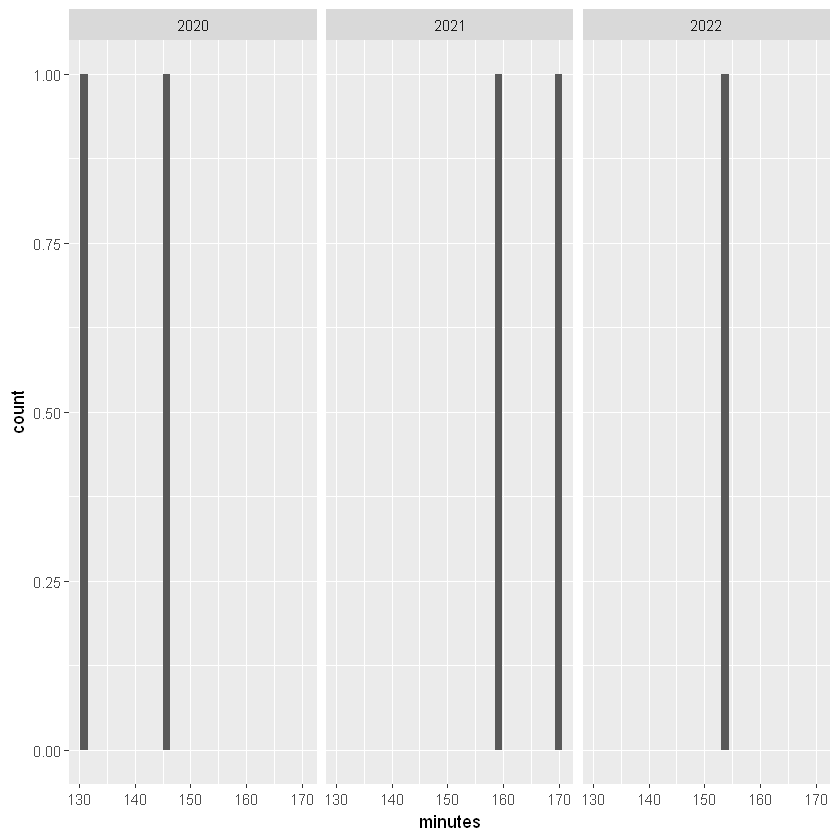

In [511]:
ggplot(halftimes, aes(x=minutes)) + 
  geom_histogram() + 
  facet_wrap(~year)

In [512]:
df3 <- df2 %>%

  filter(!duplicated(cbind(Distance,  Duration, Cal.Burned)))

In [513]:
head(df3, 20)

,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Cal.Burned,Avg.HR,Steps,minutes,year
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,4013,6.35,10.53,0.50,5.70,119.16,797,146,10360,66.88,2022
2,2267,2.14,17.64,2.31,3.40,25.99,290,119,4141,37.78,2022
3,1410,2.37,9.91,0.95,6.05,62.99,311,152,3639,23.50,2022
4,3600,6.09,9.85,0.00,6.09,0.00,820,149,9545,60.00,2022
5,5187,8.00,10.81,0.00,5.55,0.00,1117,149,13634,86.45,2022
6,1905,3.16,10.06,0.38,5.96,158.18,314,158,5020,31.75,2022
7,6268,4.26,24.48,0.83,2.45,72.12,430,87,8227,104.47,2022
8,1805,3.10,9.70,0.00,6.18,0.00,415,149,4793,30.08,2022
9,1657,1.60,17.21,1.70,3.49,35.29,227,131,3001,27.62,2022


In [514]:
linear_model$coefficients

(Intercept)    Distance 
   3.415933  125.801667

In [516]:
mlr <- lm(Distance ~ minutes + Avg.Spd, data = df2)

In [517]:
summary(mlr)


Call:
lm(formula = Distance ~ minutes + Avg.Spd, data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3083 -0.1424 -0.0108  0.1745  2.3370 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.316975   0.079604  -29.11   <2e-16 ***
minutes      0.083610   0.001017   82.20   <2e-16 ***
Avg.Spd      0.469621   0.012399   37.88   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5589 on 702 degrees of freedom
Multiple R-squared:  0.9205,	Adjusted R-squared:  0.9203 
F-statistic:  4065 on 2 and 702 DF,  p-value: < 2.2e-16


In [518]:
mlr$coefficients

(Intercept)     minutes     Avg.Spd 
-2.31697463  0.08360972  0.46962104

In [519]:
install.packages('mgcv')
library(mgcv)

Installing package into 'C:/software/Rpackages'
(as 'lib' is unspecified)



package 'mgcv' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'mgcv'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\software\Rpackages\00LOCK\mgcv\libs\x64\mgcv.dll to C:\software\Rpackages\mgcv\libs\x64\mgcv.dll: Permission denied"
Warning message:
"restored 'mgcv'"



The downloaded binary packages are in
	C:\Users\coleb\AppData\Local\Temp\RtmpgRrfQy\downloaded_packages


Loading required package: nlme


Attaching package: 'nlme'


The following object is masked from 'package:dplyr':

    collapse


This is mgcv 1.8-40. For overview type 'help("mgcv-package")'.



`geom_smooth()` using formula 'y ~ x'



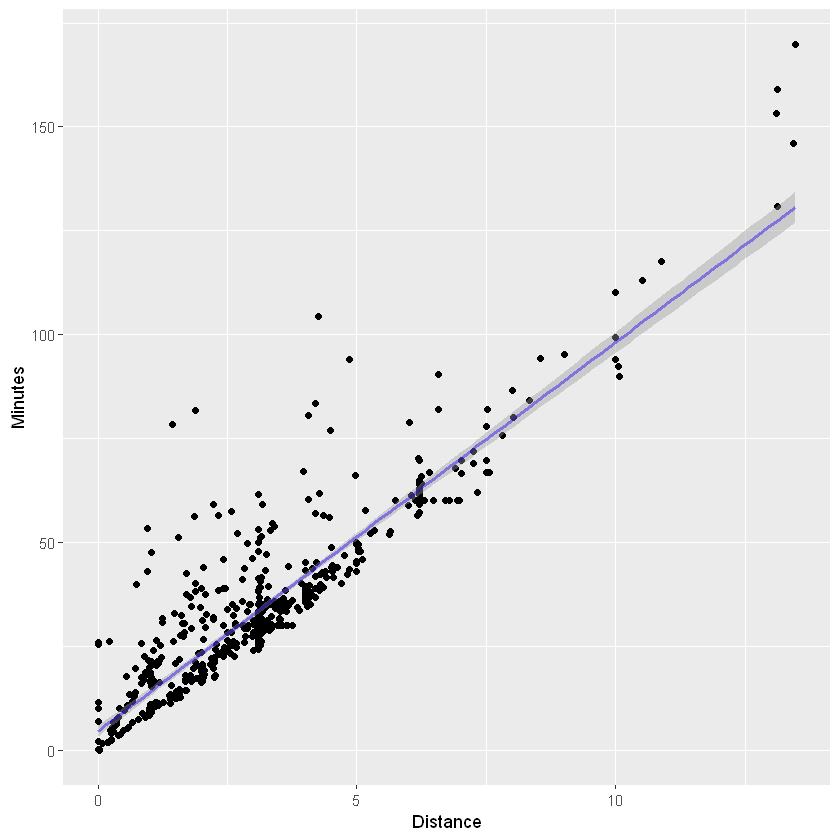

In [296]:
ggplot(df2, aes(x = Distance, y = Minutes)) +
  geom_point() + 
  stat_smooth(method = "lm", col = "#1900fa6e")

In [114]:
# score_model <- lm(duration ~ Distance, data = mm22)
# mm22$predicted_duration <- predict(score_model, mm22$Distance, interval = "confidence")

# ggplot(mm22, aes(x = duration, y = Distance)) +
#   geom_smooth(method = "lm", se = FALSE, color = "red") +  # Plot regression slope
#   geom_segment(aes(xend = duration, yend = predicted_duration), alpha = .2) +  # alpha to fade lines
#   geom_point() +
#   geom_point(aes(y = predicted_duration), shape = 1) +
#   theme_bw()  # Add theme for cleaner look

In [298]:
ggplot(lm(duration ~ Distance, data = df2)) +
  geom_point(aes(x=Duration, y=.resid))

ERROR: Error in model.frame.default(formula = duration ~ Distance, data = df2, : object is not a matrix


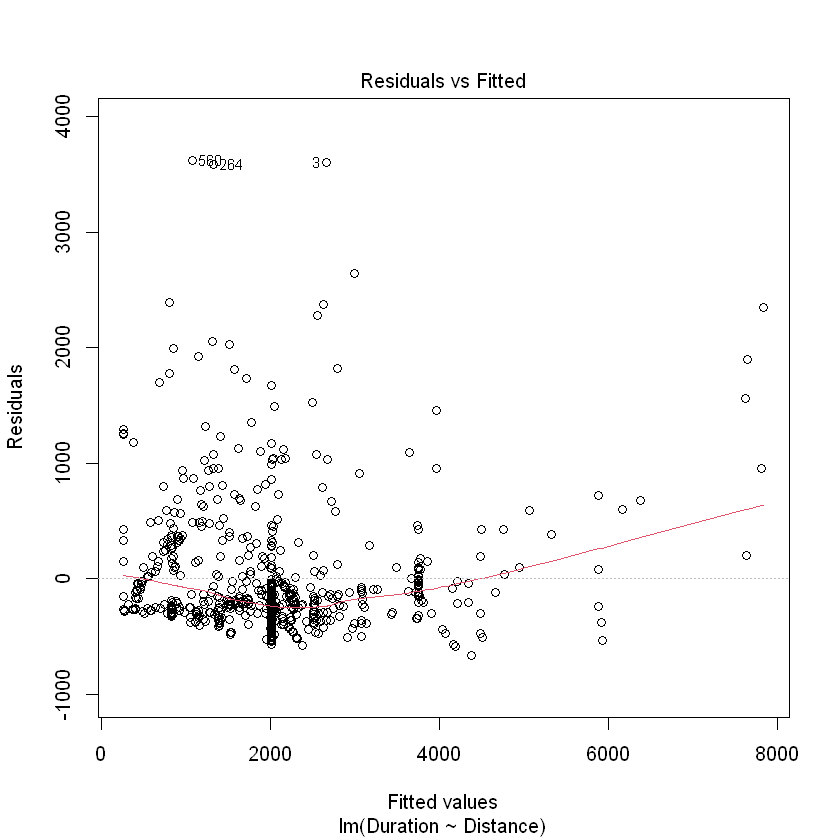

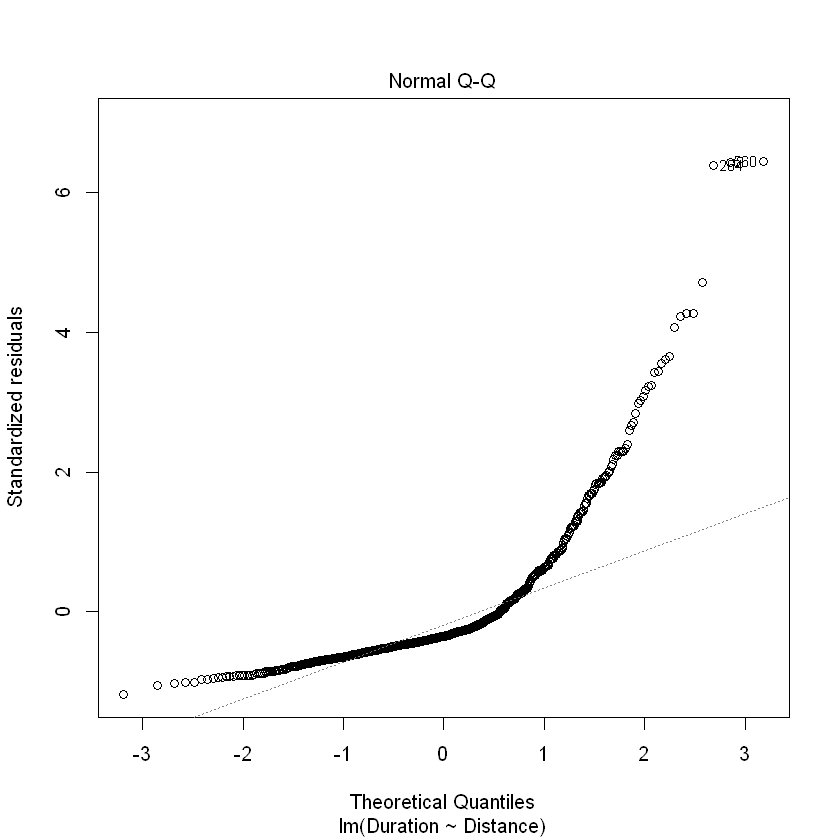

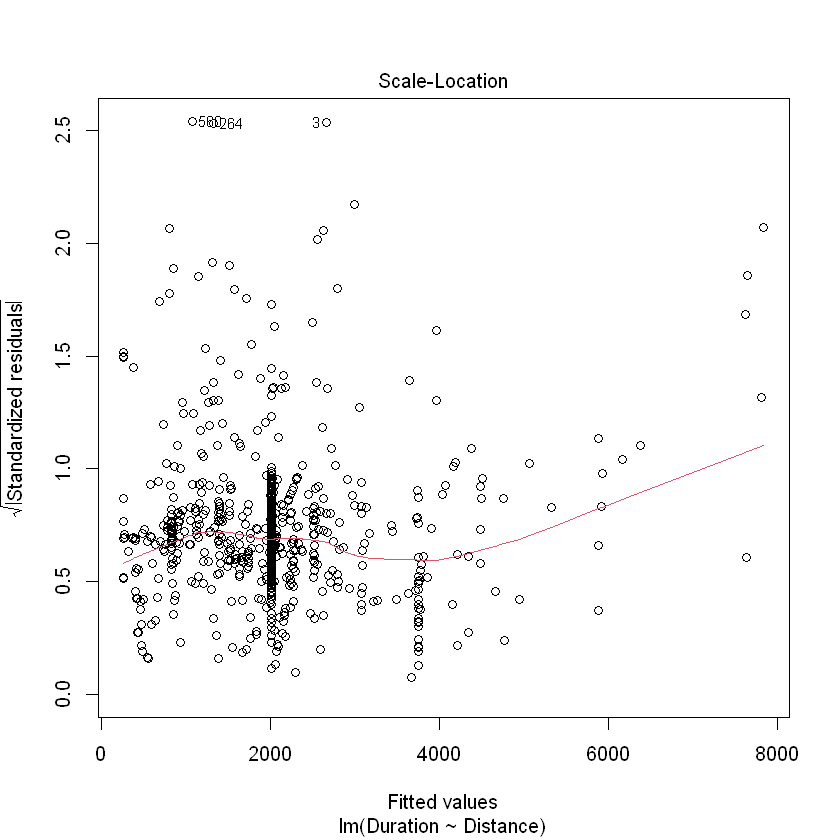

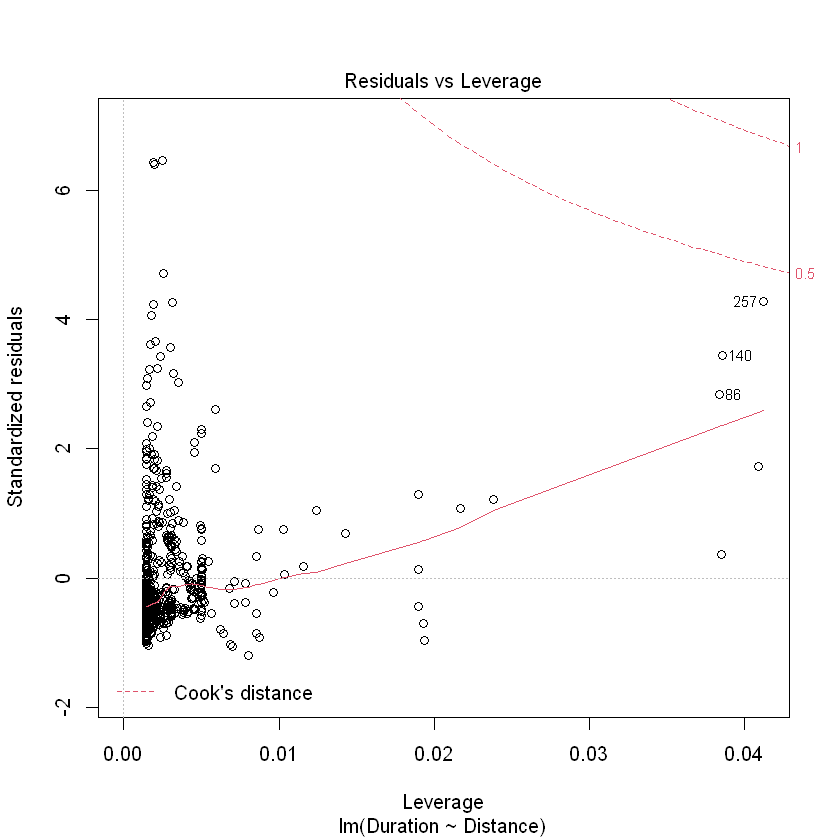

In [300]:
linear_model <- lm(Duration ~ Distance, data = df2)
plot(linear_model)

In [117]:
set.seed(20)
x <- seq(from=0, to=20, by=0.1)

# value to predict (y):
y <- 500 + 0.4 * (x-10)^3

# some noise is generated and added to the real signal (y):
noise <- rnorm(length(x), mean=10, sd=80)
noisy.y <- y + noise

`geom_smooth()` using formula 'y ~ x'



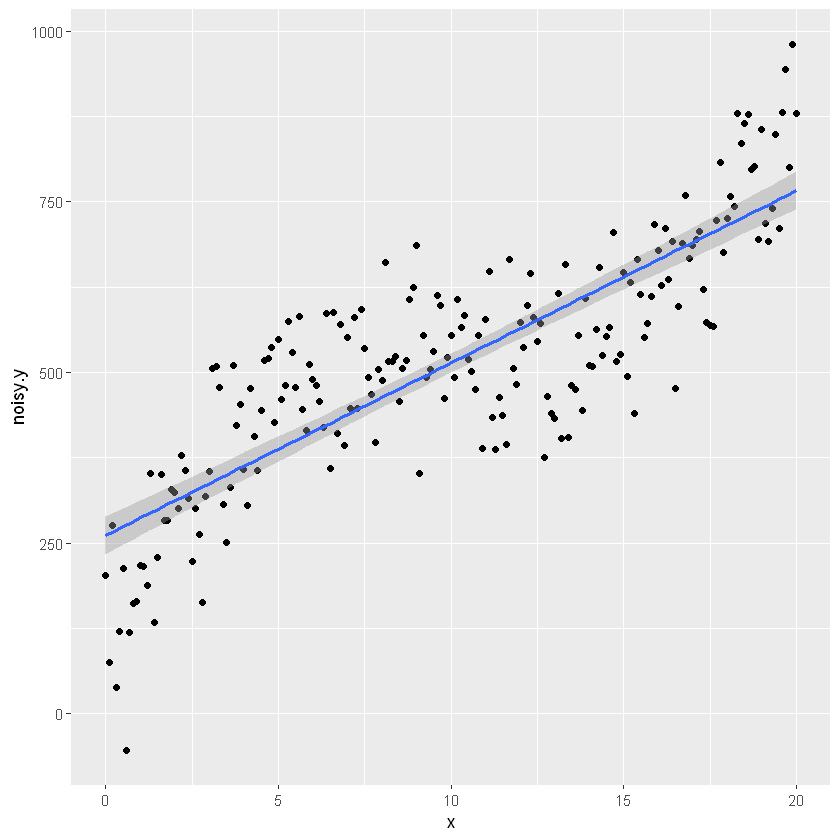

In [118]:
# fit linear model
ggplot(data=NULL,aes(x, noisy.y)) + 
    geom_point() + 
    geom_smooth(method = "lm")

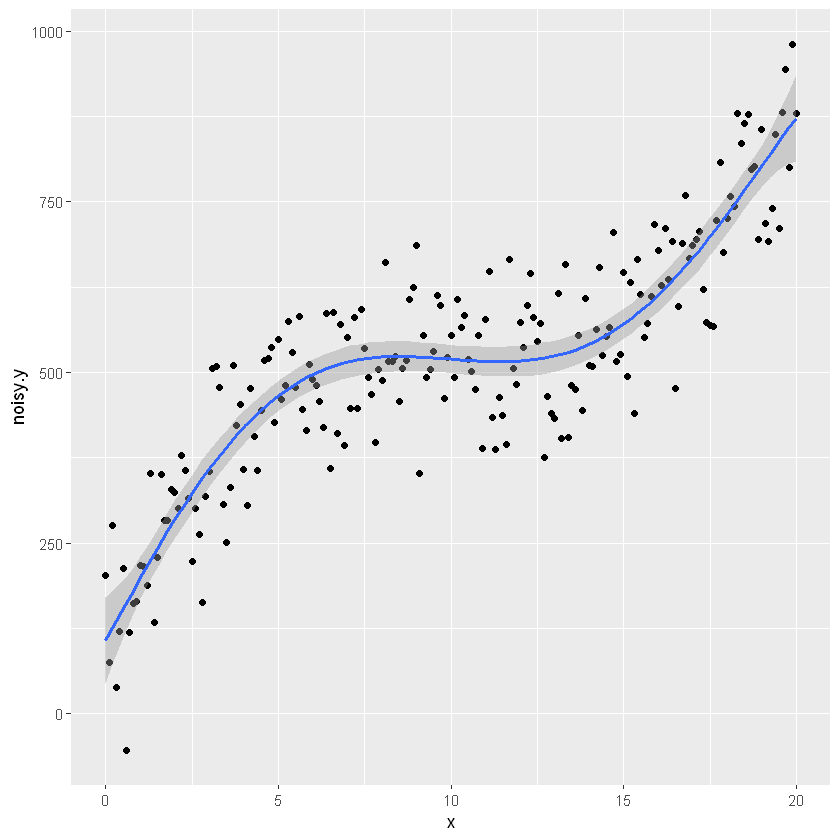

In [119]:
ggplot(data=NULL,aes(x, noisy.y)) + 
    geom_point() + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 5))

In [120]:
linear_model <- lm(duration ~ Distance, mm22)

In [121]:
mse <- mean(linear_model$residuals^2)
mse

[1] 44.11014

In [122]:
rmse <- sqrt(mse)
rmse

[1] 6.641546

In [123]:
summary(linear_model)$r.squared

[1] 0.920402

In [310]:
mlr <- lm(Distance ~ Minutes + Cal.Burned, data = df2)

In [311]:
mse_mlr <- mean(mlr$residuals^2)
mse_mlr

[1] 0.1791521

In [312]:
rmse_mlr <- sqrt(mse_mlr)
rmse_mlr

[1] 0.4232636

In [313]:
summary(mlr)$r.squared

[1] 0.9537465

In [128]:
# head(predict(score_model))

In [129]:
#install.packages("rlang")
#install.packages("tidymodels")
#install.packages('devtools')
#install.packages('Rtools')
#devtools::install_github("r-lib/rlang", build_vignettes = TRUE)

In [314]:
# Library for modeling
library(tidymodels)

# Load tidyverse
library(tidyverse)

-- Attaching packages -------------------------------------- tidymodels 1.0.0 --

v broom        1.0.0     v rsample      1.0.0
v dials        1.0.0     v tune         1.0.0
v infer        1.0.2     v workflows    1.0.0
v modeldata    1.0.0     v workflowsets 1.0.0
v parsnip      1.0.0     v yardstick    1.0.0
v recipes      1.0.1     

-- Conflicts ----------------------------------------- tidymodels_conflicts() --
x data.table::between()   masks dplyr::between()
x nlme::collapse()        masks dplyr::collapse()
x scales::discard()       masks purrr::discard()
x dplyr::filter()         masks stats::filter()
x data.table::first()     masks dplyr::first()
x recipes::fixed()        masks stringr::fixed()
x dplyr::lag()            masks stats::lag()
x data.table::last()      masks dplyr::last()
x yardstick::spec()       masks readr::spec()
x recipes::step()         masks stats::step()
x data.table::transpose() masks purrr::transpose()
* Search for functions across packages at https://www.

In [131]:
head(mymerge)

,Date,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,⋯,Max.Pace,Avg.Spd,Max.Speed,Avg.HR,Steps.y,duration,day,month,year,Miles
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>
1,2021-09-23,12:18:41,2021-09-23T12:59:29.798Z,WORKOUT,RUNNING,Automatic,-5,76.51169,2160000.0,269798.0,⋯,2.40,5.98,24.99,146,5720,35.72,Thursday,September,2021,"(3.09,6.21]"
2,2021-09-24,12:30:07,2021-09-24T13:13:14.739Z,WORKOUT,RUNNING,Automatic,-5,76.28969833333333,2040000.0,494739.0,⋯,4.25,6.36,14.13,161,5340,33.58,Friday,September,2021,"(3.09,6.21]"
3,2021-09-25,16:42:43,2021-09-25T17:20:33.052Z,WORKOUT,RUNNING,Automatic,-5,72.41923333333332,2133052.0,76050.0,⋯,0.00,6.65,0.00,0,5790,36.07,Saturday,September,2021,"(3.09,6.21]"
4,2021-09-26,15:24:57,2021-09-26T16:03:50.992Z,WORKOUT,RUNNING,Automatic,-5,72.90168750000001,2100000.0,170992.0,⋯,0.00,6.74,0.00,0,5720,35.58,Sunday,September,2021,"(3.09,6.21]"
5,2021-09-27,12:19:08,2021-09-27T12:58:47.413Z,WORKOUT,RUNNING,Automatic,-5,72.83315583333334,2040000.0,287413.0,⋯,0.96,6.38,62.79,150,5405,33.53,Monday,September,2021,"(3.09,6.21]"
6,2021-09-28,10:05:11,2021-09-28T10:56:40.224Z,WORKOUT,RUNNING,Automatic,-5,94.7111225,2640000.0,400224.0,⋯,0.90,6.16,67.00,153,6816,42.88,Tuesday,September,2021,"(3.09,6.21]"


In [132]:
smmg <- mymerge %>% select(c(Distance, duration, Activity.Score, Avg.HR, Steps.y))

In [133]:
head(smmg)

,Distance,duration,Activity.Score,Avg.HR,Steps.y
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,3.56,35.72,76.51169,146,5720
2,3.56,33.58,76.28969833333333,161,5340
3,4.00,36.07,72.41923333333332,0,5790
4,4.00,35.58,72.90168750000001,0,5720
5,3.57,33.53,72.83315583333334,150,5405
6,4.40,42.88,94.7111225,153,6816


In [134]:
set.seed(1234)
flight_split <- initial_split(smmg)
train_data <- training(flight_split)
test_data <- testing(flight_split)

In [135]:
library(tidyverse)
# Pick linear regression
lm_spec <- linear_reg() %>%
  # Set engine
  set_engine(engine = "lm")

# Print the linear function
lm_spec

Linear Regression Model Specification (regression)

Computational engine: lm 


#### Extra

In [136]:
# test <- read.csv("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", header=TRUE)

In [137]:
# library(dplyr)
# library(tidyr)
# cadf <- cadf %>% separate(Start.Time, c('Date', 'Time'), "T")

In [138]:
# cadf <- cadf %>% mutate(Date = as.Date(Date))

In [139]:
# names(test)[names(test) == "Workout.Date"] <- "Date"


In [140]:
# test$Workout.Date <- as.Date(test$Workout.Date, format = "%B %e, %Y")

In [141]:
# mmerge2 <- merge(test, df, by = "Date", all.x=TRUE)

In [142]:
head(mmerge2, 2)
mmerge2 <- as.data.frame(mmerge2)

ERROR: Error in head(mmerge2, 2): object 'mmerge2' not found


In [ ]:
mmerge2 <- mmerge2[order(mmerge2$Date, decreasing = TRUE),]

In [ ]:
mmerge2

,Date,Date.Submitted,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,⋯,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps.y,duration,year
,<date>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
676,2022-07-10,"July 10, 2022",Run,429,3.09815,2301,12.37320,0.993196,4.84920,60.4110,⋯,3.10,2301,12.37,0.990,4.85,60.41000,149.0000,5125,38.35,2022
675,2022-07-09,"July 9, 2022",Run,430,3.10009,2005,10.77380,1.166080,5.56904,51.4543,⋯,3.10,2005,10.77,1.170,5.57,51.45000,157.0000,5261,33.42,2022
674,2022-07-08,"July 8, 2022",Run,454,3.10995,1988,10.64940,3.878360,5.63410,15.4704,⋯,3.11,1988,10.65,3.880,5.63,15.47000,165.0000,5202,33.13,2022
673,2022-06-24,"June 24, 2022",Run,400,3.10000,1554,8.35484,0.000000,7.18147,0.0000,⋯,3.10,1554,8.35,4.026,7.18,52.59158,140.5377,4192,25.90,2022
672,2022-06-23,"June 23, 2022",Run,410,3.10000,1748,9.39785,0.000000,6.38444,0.0000,⋯,3.10,1748,9.40,4.026,6.38,52.59158,140.5377,4656,29.13,2022
671,2022-06-22,"June 21, 2022",Run,403,3.10000,1665,8.95161,0.000000,6.70270,0.0000,⋯,3.10,1665,8.95,4.026,6.70,52.59158,140.5377,4458,27.75,2022
670,2022-06-19,"June 19, 2022",Run,378,2.66000,1800,11.27820,0.000000,5.32000,0.0000,⋯,2.66,1800,11.28,4.026,5.32,52.59158,140.5377,4713,30.00,2022
669,2022-06-18,"June 18, 2022",Run,370,2.57857,1698,10.96610,1.112400,5.47140,53.9375,⋯,2.58,1698,10.97,1.110,5.47,53.94000,159.0000,4431,28.30,2022
668,2022-06-17,"June 16, 2022",Run,315,2.33000,1391,9.94993,0.000000,6.03019,0.0000,⋯,2.33,1391,9.95,4.026,6.03,52.59158,140.5377,3684,23.18,2022


In [ ]:
library(tidyr)
testdf2 <- mmerge2 %>% drop_na()

In [ ]:
testdf2

Date,Date.Submitted,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,⋯,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps.y,duration,year
<date>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2022-07-10,"July 10, 2022",Run,429,3.09815,2301,12.37320,0.993196,4.84920,60.4110,⋯,3.10,2301,12.37,0.990,4.85,60.41000,149.0000,5125,38.35,2022
2022-07-09,"July 9, 2022",Run,430,3.10009,2005,10.77380,1.166080,5.56904,51.4543,⋯,3.10,2005,10.77,1.170,5.57,51.45000,157.0000,5261,33.42,2022
2022-07-08,"July 8, 2022",Run,454,3.10995,1988,10.64940,3.878360,5.63410,15.4704,⋯,3.11,1988,10.65,3.880,5.63,15.47000,165.0000,5202,33.13,2022
2022-06-18,"June 18, 2022",Run,370,2.57857,1698,10.96610,1.112400,5.47140,53.9375,⋯,2.58,1698,10.97,1.110,5.47,53.94000,159.0000,4431,28.30,2022
2022-06-12,"June 12, 2022",Run,428,3.09762,1955,10.51630,3.008140,5.70545,19.9459,⋯,3.10,1955,10.52,3.010,5.71,19.95000,140.5377,5052,32.58,2022
2022-06-10,"June 10, 2022",Run,881,6.20257,4182,11.23370,0.599692,5.34108,100.0510,⋯,6.20,4182,11.23,0.600,5.34,100.05000,153.0000,10479,69.70,2022
2022-06-08,"June 9, 2022",Run,407,3.11000,1702,9.12111,0.000000,6.57814,0.0000,⋯,3.11,1702,9.12,4.026,6.58,52.59158,153.0000,4548,28.37,2022
2022-06-06,"June 6, 2022",Run,590,4.50165,2924,10.82230,1.146470,5.54409,52.3344,⋯,4.50,2924,10.82,1.150,5.54,52.33000,145.0000,7739,48.73,2022
2022-06-05,"June 5, 2022",Walk,253,1.88061,2402,21.27700,1.791470,2.81995,33.4920,⋯,1.88,2402,21.28,1.790,2.82,33.49000,109.0000,3994,40.03,2022


In [ ]:
library(tidyr)
test <- separate(test, Time, c('Times', 'Ms'), "[.]")

In [ ]:
library("lubridate")
hours <- -3600 * mymerge$Local.Time.Zone.Offset
mymerge$my_date_time1 <- mymerge$DTS + (-3600 * mymerge$Local.Time.Zone.Offset)

### Prep to upload to SQL database

In [145]:
#head(mymerge)
df2 <- mymerge[order(mymerge$Date, decreasing = TRUE),]
head(df2)

,Date,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,⋯,Max.Pace,Avg.Spd,Max.Speed,Avg.HR,Steps.y,duration,day,month,year,Miles
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>
149,2022-07-18,00:20:44,2022-07-18T00:54:35.062Z,WORKOUT,RUNNING,Automatic,-6,57.01286,1560000.0,300000.0,⋯,0.46,5.68,130.30,143,14918,95.15,Monday,July,2022,"(6.21,13.1]"
150,2022-07-18,11:29:11,2022-07-18T13:11:43.104Z,WORKOUT,RUNNING,Automatic,-6,191.76713333333333,5568514.0,360000.0,⋯,0.46,5.68,130.30,143,14918,95.15,Monday,July,2022,"(6.21,13.1]"
148,2022-07-17,18:57:19,2022-07-16T19:31:10.404Z,WORKOUT,RUNNING,Automatic,-6,58.679566666666666,1680000.0,160774.0,⋯,0.00,7.01,0.00,0,4286,26.55,Sunday,July,2022,"(3.09,6.21]"
147,2022-07-14,12:50:31,2022-07-14T13:31:22.500Z,WORKOUT,RUNNING,Automatic,-6,74.44854083333334,2100000.0,262500.0,⋯,1.00,6.27,59.92,148,5684,35.95,Thursday,July,2022,"(3.09,6.21]"
146,2022-07-13,16:30:21,2022-07-13T17:11:12.440Z,WORKOUT,RUNNING,Automatic,-6,73.20733333333334,1980000.0,432440.0,⋯,1.09,5.85,54.80,150,4991,31.87,Wednesday,July,2022,"(3.09,6.21]"
144,2022-07-12,15:21:45,2022-07-12T15:59:37.701Z,WORKOUT,RUNNING,Automatic,-6,68.7403375,1980000.0,157701.0,⋯,1.07,5.69,56.08,155,5134,32.80,Tuesday,July,2022,"(3.09,6.21]"


In [146]:
df3 <- mymerge %>% select(c(Date, Distance, duration, Activity.Score, Avg.HR, Steps.y, Cal.Burned)) 


In [147]:
library(tidyverse)
df4 <- df3 %>% filter(!duplicated(cbind(df3$Date, df3$duration)))
df5 <- df4 [order(df4$Date, decreasing = TRUE), ]

In [148]:
df5 <- df5 %>% rename(Date = "Date", Distance = "Distance", duration = "duration", Activity_Score = "Activity.Score", AvgHR = "Avg.HR", Stepsy = "Steps.y", CalBurned = "Cal.Burned")

In [149]:
head(df5)

,Date,Distance,duration,Activity_Score,AvgHR,Stepsy,CalBurned
,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
122,2022-07-18,9.00,95.15,57.01286,143,14918,1175
121,2022-07-17,3.10,26.55,58.679566666666666,0,4286,404
120,2022-07-14,3.76,35.95,74.44854083333334,148,5684,452
119,2022-07-13,3.11,31.87,73.20733333333334,150,4991,398
118,2022-07-12,3.11,32.80,68.7403375,155,5134,421
117,2022-07-10,3.10,38.35,47.92118166666667,149,5125,429


In [150]:
write.csv(df5, "C:/Users/coleb/OneDrive/Cosmo/user94403143_workout_history_df3.csv", row.names = FALSE)